# MP2: ECE/CS 498 DSG (Spring 2020)
##### TEAM: Meghna Shrivastava, Mohit Jain, Tafseer Khan
##### netID:  meghna3, mohitj2, tafseer2

# Unsupervised Stool Sample Analysis in Hepatic Encephalopathy
## ECE/CS 498 DS Mini Project 2 

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.stats import ks_2samp
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import sys # Includeing systems
import warnings # Including Warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.cluster import hierarchy
import itertools

if not sys.warnoptions: # Ignore 
    warnings.simplefilter("ignore")

In [2]:
#RelativeAbundance_HE0=pd.read_csv('RelativeAbundance_HE0.csv')
QualityControl=pd.read_csv('QualityControl.csv')
BayesInferenceHE0=pd.read_csv('BayesInferenceHE0.csv')
BayesInferenceHE1=pd.read_csv('BayesInferenceHE1.csv')
RelativeAbundance_HE0=pd.read_csv('RelativeAbundance_HE0.csv')
RelativeAbundance_HE1=pd.read_csv('RelativeAbundance_HE1.csv')

# Task 1: Data Cleaning and Visual Inspection
## 0. Getting Started With the Data
Answer the following questions based on RelativeAbundance_HE0.csv:
#### 1- In the context of statistical analysis, why do biologists need multiple samples to identify microbes with significantly altered abundance?
- Ans: A strong analysis is the one which has more data in it. If the data provided is right, it will help the doctors to find the causes behind the diseases. The more the number of samples will be, the more information we can extract from data. Including that a smaller number of populations will give biased results. Which, instead of helping can cause more damage. Because, human health is a serious issue.

#### 2. How many samples were analyzed?

In [3]:
samples=len(RelativeAbundance_HE0.columns)-1
print(samples, "samples were analyzed")
print(RelativeAbundance_HE0.shape)

764 samples were analyzed
(149, 765)


#### 3. How many microbes were identified?

In [4]:
number=RelativeAbundance_HE0['Microbe Name'].count()
print(number, "microbes were analyzed")

149 microbes were analyzed


## 1. Bayesian Network for Quality Control
### a. Joint Probability Factorization
- OverallProbablity= P(Strong_Temp)* P(Collection_Methods) * P(Contamination | Strong_Temp,Collection_Methods) * P(LabTimeBefore) * P(Qyality | Contamination,LabTimeBefore)
### b. Parameters Required
- for strong temp=1
- for collection methods=1
- for Contamination=4
- for labtimebefore= 1
- for quality= 4
- The total parameters required will be = 1+1+4+14=11
### c. Constructing Probability Tables
### Conditional probability table of P(Quality|Contamination, Lab Time),

In [5]:
High_Contamination=QualityControl[QualityControl.cont=="high"]
Low_Contamination=QualityControl[~QualityControl.isin(High_Contamination)].dropna()
Short_LabTime_High_Contamination=High_Contamination[High_Contamination.labtime=="short"]
Short_LabTime_Low_Contamination=Low_Contamination[Low_Contamination.labtime=="short"]
Long_LabTime_High_Contamination=High_Contamination[~High_Contamination.isin(Short_LabTime_High_Contamination)].dropna()
Long_LabTime_Low_Contamination=Low_Contamination[~Low_Contamination.isin(Short_LabTime_Low_Contamination)].dropna()
Good_Quality_Short_LabTime_High_Contamination=Short_LabTime_High_Contamination[Short_LabTime_High_Contamination.qual=="good"]
Good_Quality_Short_LabTime_Low_Contamination=Short_LabTime_Low_Contamination[Short_LabTime_Low_Contamination.qual=="good"]
Good_Quality_Long_LabTime_High_Contamination=Long_LabTime_High_Contamination[Long_LabTime_High_Contamination.qual=="good"]
Good_Quality_Long_LabTime_Low_Contamination=Long_LabTime_Low_Contamination[Long_LabTime_Low_Contamination.qual=="good"]
probablity_of_Good_Quality_Short_LabTime_High_Contamination=len(Good_Quality_Short_LabTime_High_Contamination)/len(Short_LabTime_High_Contamination)
probablity_of_Bad_Quality_Short_LabTime_High_Contamination=1-probablity_of_Good_Quality_Short_LabTime_High_Contamination
probablity_of_Good_Quality_Short_LabTime_Low_Contamination=len(Good_Quality_Short_LabTime_Low_Contamination)/len(Short_LabTime_Low_Contamination)
probablity_of_Bad_Quality_Short_LabTime_Low_Contamination=1-probablity_of_Good_Quality_Short_LabTime_Low_Contamination
probablity_of_Good_Quality_Long_LabTime_High_Contamination=len(Good_Quality_Long_LabTime_High_Contamination)/len(Long_LabTime_High_Contamination)
probablity_of_Bad_Quality_Long_LabTime_High_Contamination=1-probablity_of_Good_Quality_Long_LabTime_High_Contamination
probablity_of_Good_Quality_Long_LabTime_Low_Contamination=len(Good_Quality_Long_LabTime_Low_Contamination)/len(Long_LabTime_Low_Contamination)
probablity_of_Bad_Quality_Long_LabTime_Low_Contamination=1-probablity_of_Good_Quality_Long_LabTime_Low_Contamination
print("Parents/Quality                  Good Bad")
print("Long_LabTime_High_Contamination ",round(probablity_of_Good_Quality_Long_LabTime_High_Contamination,2),round(probablity_of_Bad_Quality_Long_LabTime_High_Contamination,2))
print("Short_LabTime_High_Contamination",round(probablity_of_Good_Quality_Short_LabTime_High_Contamination,2),round(probablity_of_Bad_Quality_Short_LabTime_High_Contamination,2))
print("Long_LabTime_Low_Contamination  ",round(probablity_of_Good_Quality_Long_LabTime_Low_Contamination,2),round(probablity_of_Bad_Quality_Long_LabTime_Low_Contamination,2))
print("Short_LabTime_Low_Contamination ",round(probablity_of_Good_Quality_Short_LabTime_Low_Contamination,2),round(probablity_of_Bad_Quality_Short_LabTime_Low_Contamination,2))

Parents/Quality                  Good Bad
Long_LabTime_High_Contamination  0.03 0.97
Short_LabTime_High_Contamination 0.94 0.06
Long_LabTime_Low_Contamination   0.92 0.08
Short_LabTime_Low_Contamination  0.96 0.04


### Conditional probability table of  P(Contamination|Storage Temp, Collection Method)

In [6]:
Cold_Temprature=QualityControl[QualityControl.strtmp=="cold"]
Cool_Temprarture=QualityControl[~QualityControl.isin(Cold_Temprature)].dropna()
Nurse_Collection_Cold_Temprature=Cold_Temprature[Cold_Temprature.coll=="nurse"]
Nurse_Collection_Cool_Temprarture=Cool_Temprarture[Cool_Temprarture.coll=="nurse"]
Patient_Collection_Cold_Temprature=Cold_Temprature[~Cold_Temprature.isin(Nurse_Collection_Cold_Temprature)].dropna()
Patient_Collection_Cool_Temprarture=Cool_Temprarture[~Cool_Temprarture.isin(Nurse_Collection_Cool_Temprarture)].dropna()
High_Contamination_Nurse_Collection_Cold_Temprature=Nurse_Collection_Cold_Temprature[Nurse_Collection_Cold_Temprature.cont=="high"]
High_Contamination_Nurse_Collection_Cool_Temprarture=Nurse_Collection_Cool_Temprarture[Nurse_Collection_Cool_Temprarture.cont=="high"]
High_Contamination_Patient_Collection_Cold_Temprature=Patient_Collection_Cold_Temprature[Patient_Collection_Cold_Temprature.cont=="high"]
High_Contamination_Patient_Collection_Cool_Temprarture=Patient_Collection_Cool_Temprarture[Patient_Collection_Cool_Temprarture.cont=="high"]
probablity_of_High_Contamination_Nurse_Collection_Cold_Temprature=len(High_Contamination_Nurse_Collection_Cold_Temprature)/len(Nurse_Collection_Cold_Temprature)
probablity_of_Low_Contamination_Nurse_Collection_Cold_Temprature=1-probablity_of_High_Contamination_Nurse_Collection_Cold_Temprature
probablity_of_High_Contamination_Nurse_Collection_Cool_Temprarture=len(High_Contamination_Nurse_Collection_Cool_Temprarture)/len(Nurse_Collection_Cool_Temprarture)
probablity_of_Low_Contamination_Nurse_Collection_Cool_Temprarture=1-probablity_of_High_Contamination_Nurse_Collection_Cool_Temprarture
probablity_of_High_Contamination_Patient_Collection_Cold_Temprature=len(High_Contamination_Patient_Collection_Cold_Temprature)/len(Patient_Collection_Cold_Temprature)
probablity_of_Low_Contamination_Patient_Collection_Cold_Temprature=1-probablity_of_High_Contamination_Patient_Collection_Cold_Temprature
probablity_of_High_Contamination_Patient_Collection_Cool_Temprarture=len(High_Contamination_Patient_Collection_Cool_Temprarture)/len(Patient_Collection_Cool_Temprarture)
probablity_of_Low_Contamination_Patient_Collection_Cool_Temprarture=1-probablity_of_High_Contamination_Patient_Collection_Cool_Temprarture
print("Parents/Contamination                 High Low")
print("Nurse_Collection_Cold_Temprature     ",round(probablity_of_High_Contamination_Nurse_Collection_Cold_Temprature,2),round(probablity_of_Low_Contamination_Nurse_Collection_Cold_Temprature,2))
print("Nurse_Collection_Cool_Temprarture    ",round(probablity_of_High_Contamination_Nurse_Collection_Cool_Temprarture,2),round(probablity_of_Low_Contamination_Nurse_Collection_Cool_Temprarture,2))
print("Patient_Collection_Cold_Temprature   ",round(probablity_of_High_Contamination_Patient_Collection_Cold_Temprature,2),round(probablity_of_Low_Contamination_Patient_Collection_Cold_Temprature,2))
print("Patient_Collection_Cool_Temprarture  ",round(probablity_of_High_Contamination_Patient_Collection_Cool_Temprarture,2),round(probablity_of_Low_Contamination_Patient_Collection_Cool_Temprarture,2))

Parents/Contamination                 High Low
Nurse_Collection_Cold_Temprature      0.04 0.96
Nurse_Collection_Cool_Temprarture     0.09 0.91
Patient_Collection_Cold_Temprature    0.08 0.92
Patient_Collection_Cool_Temprarture   0.84 0.16


### Conditional probability table Storage Temprature

In [7]:
Cold=QualityControl[QualityControl.strtmp=="cold"]
probablity_of_cold=(len(Cold)/len(QualityControl))
probablity_of_cool=1-probablity_of_cold
print("probablity_of_cold    probablity_of_cool")
print(probablity_of_cold,"              ",probablity_of_cool)

probablity_of_cold    probablity_of_cool
0.8982                0.1018


### Conditional probability table of Collection Method

In [8]:
Nurse=QualityControl[QualityControl.coll=="nurse"]
probablity_of_Nurse=(len(Nurse)/len(QualityControl))
probablity_of_Patient=1-probablity_of_Nurse
print("probablity_of_Nurse    probablity_of_Patient")
print(probablity_of_Nurse,"               ",probablity_of_Patient)

probablity_of_Nurse    probablity_of_Patient
0.8976                 0.10240000000000005


### Conditional probability table of Lab Time

In [9]:
Short=QualityControl[QualityControl.labtime=="short"]
probablity_of_Short=(len(Short)/len(QualityControl))
probablity_of_Long=1-probablity_of_Short
print("probablity_of_Short    probablity_of_Long")
print(probablity_of_Short,"               ",probablity_of_Long)

probablity_of_Short    probablity_of_Long
0.7956                 0.20440000000000003


### d. Final Probability Tables

In [10]:

Cold_Temprature=QualityControl[QualityControl.strtmp=="cold"]
Cool_Temprarture=QualityControl[~QualityControl.isin(Cold_Temprature)].dropna()
Nurse_Collection_Cold_Temprature=Cold_Temprature[Cold_Temprature.coll=="nurse"]
Nurse_Collection_Cool_Temprarture=Cool_Temprarture[Cool_Temprarture.coll=="nurse"]
Patient_Collection_Cold_Temprature=Cold_Temprature[~Cold_Temprature.isin(Nurse_Collection_Cold_Temprature)].dropna()
Patient_Collection_Cool_Temprarture=Cool_Temprarture[~Cool_Temprarture.isin(Nurse_Collection_Cool_Temprarture)].dropna()
Short_Time_Nurse_Collection_Cold_Temprature=Nurse_Collection_Cold_Temprature[Nurse_Collection_Cold_Temprature.labtime=="short"]
Short_Time_Nurse_Collection_Cool_Temprarture=Nurse_Collection_Cool_Temprarture[Nurse_Collection_Cool_Temprarture.labtime=="short"]
Short_Time_Patient_Collection_Cold_Temprature=Patient_Collection_Cold_Temprature[Patient_Collection_Cold_Temprature.labtime=="short"]
Short_TimePatient_Collection_Cool_Temprarture=Patient_Collection_Cool_Temprarture[Patient_Collection_Cool_Temprarture.labtime=="short"]
Long_Time_Nurse_Collection_Cold_Temprature=Nurse_Collection_Cold_Temprature[~Nurse_Collection_Cold_Temprature.isin(Short_Time_Nurse_Collection_Cold_Temprature)].dropna()
Long_Time_Nurse_Collection_Cool_Temprarture=Nurse_Collection_Cool_Temprarture[~Nurse_Collection_Cool_Temprarture.isin(Short_Time_Nurse_Collection_Cool_Temprarture)].dropna()
Long_Time_Patient_Collection_Cold_Temprature=Patient_Collection_Cold_Temprature[~Patient_Collection_Cold_Temprature.isin(Short_Time_Patient_Collection_Cold_Temprature)].dropna()
Long_Time_Patient_Collection_Cool_Temprarture=Patient_Collection_Cool_Temprarture[~Patient_Collection_Cool_Temprarture.isin(Short_TimePatient_Collection_Cool_Temprarture)].dropna()
Good_Quality_Short_Time_Nurse_Collection_Cold_Temprature=Short_Time_Nurse_Collection_Cold_Temprature[Short_Time_Nurse_Collection_Cold_Temprature.qual=="good"]
Good_Quality_Short_Time_Nurse_Collection_Cool_Temprarture=Short_Time_Nurse_Collection_Cool_Temprarture[Short_Time_Nurse_Collection_Cool_Temprarture.qual=="good"]
Good_Quality_Short_Time_Patient_Collection_Cold_Temprature=Short_Time_Patient_Collection_Cold_Temprature[Short_Time_Patient_Collection_Cold_Temprature.qual=="good"]
Good_Quality_Short_TimePatient_Collection_Cool_Temprarture=Short_TimePatient_Collection_Cool_Temprarture[Short_TimePatient_Collection_Cool_Temprarture.qual=="good"]
Good_Quality_Long_Time_Nurse_Collection_Cold_Temprature=Long_Time_Nurse_Collection_Cold_Temprature[Long_Time_Nurse_Collection_Cold_Temprature.qual=="good"]
Good_Quality_Long_Time_Nurse_Collection_Cool_Temprarture=Long_Time_Nurse_Collection_Cool_Temprarture[Long_Time_Nurse_Collection_Cool_Temprarture.qual=="good"]
Good_Quality_Long_Time_Patient_Collection_Cold_Temprature=Long_Time_Patient_Collection_Cold_Temprature[Long_Time_Patient_Collection_Cold_Temprature.qual=="good"]
Good_Quality_Long_Time_Patient_Collection_Cool_Temprarture=Long_Time_Patient_Collection_Cool_Temprarture[Long_Time_Patient_Collection_Cool_Temprarture.qual=="good"]
prob_of_Good_Quality_Short_Time_Nurse_Collection_Cold_Temprature=len(Good_Quality_Short_Time_Nurse_Collection_Cold_Temprature)/len(Short_Time_Nurse_Collection_Cold_Temprature)
prob_of_Good_Quality_Short_Time_Nurse_Collection_Cool_Temprarture=len(Good_Quality_Short_Time_Nurse_Collection_Cool_Temprarture)/len(Short_Time_Nurse_Collection_Cool_Temprarture)
prob_of_Good_Quality_Short_Time_Patient_Collection_Cold_Temprature=len(Good_Quality_Short_Time_Patient_Collection_Cold_Temprature)/len(Short_Time_Patient_Collection_Cold_Temprature)
prob_of_Good_Quality_Short_TimePatient_Collection_Cool_Temprarture=len(Good_Quality_Short_TimePatient_Collection_Cool_Temprarture)/len(Short_TimePatient_Collection_Cool_Temprarture)
prob_of_Good_Quality_Long_Time_Nurse_Collection_Cold_Temprature=len(Good_Quality_Long_Time_Nurse_Collection_Cold_Temprature)/len(Long_Time_Nurse_Collection_Cold_Temprature)
prob_of_Good_Quality_Long_Time_Nurse_Collection_Cool_Temprarture=len(Good_Quality_Long_Time_Nurse_Collection_Cool_Temprarture)/len(Long_Time_Nurse_Collection_Cool_Temprarture)
prob_of_Good_Quality_Long_Time_Patient_Collection_Cold_Temprature=len(Good_Quality_Long_Time_Patient_Collection_Cold_Temprature)/len(Long_Time_Patient_Collection_Cold_Temprature)
prob_of_Good_Quality_Long_Time_Patient_Collection_Cool_Temprarture=len(Good_Quality_Long_Time_Patient_Collection_Cool_Temprarture)/len(Long_Time_Patient_Collection_Cool_Temprarture)
prob_of_Bad_Quality_Short_Time_Nurse_Collection_Cold_Temprature=1-prob_of_Good_Quality_Short_Time_Nurse_Collection_Cold_Temprature
prob_of_Bad_Quality_Short_Time_Nurse_Collection_Cool_Temprarture=1-prob_of_Good_Quality_Short_Time_Nurse_Collection_Cool_Temprarture
prob_of_Bad_Quality_Short_Time_Patient_Collection_Cold_Temprature=1-prob_of_Good_Quality_Short_Time_Patient_Collection_Cold_Temprature
prob_of_Bad_Quality_Short_TimePatient_Collection_Cool_Temprarture=1-prob_of_Good_Quality_Short_TimePatient_Collection_Cool_Temprarture
prob_of_Bad_Quality_Long_Time_Nurse_Collection_Cold_Temprature=1-prob_of_Good_Quality_Long_Time_Nurse_Collection_Cold_Temprature
prob_of_Bad_Quality_Long_Time_Nurse_Collection_Cool_Temprarture=1-prob_of_Good_Quality_Long_Time_Nurse_Collection_Cool_Temprarture
prob_of_Bad_Quality_Long_Time_Patient_Collection_Cold_Temprature=1-prob_of_Good_Quality_Long_Time_Patient_Collection_Cold_Temprature
prob_of_Bad_Quality_Long_Time_Patient_Collection_Cool_Temprarture=1-prob_of_Good_Quality_Long_Time_Patient_Collection_Cool_Temprarture
print("Parents/Quality                                 Good Bad")
print("Short_Time Nurse_Collection Cold_Temprature    ",round(prob_of_Good_Quality_Short_Time_Nurse_Collection_Cold_Temprature,2),round(prob_of_Bad_Quality_Short_Time_Nurse_Collection_Cold_Temprature,2))
print("Short_Time Nurse_Collection Cool_Temprarture   ",round(prob_of_Good_Quality_Short_Time_Nurse_Collection_Cool_Temprarture,2),round(prob_of_Bad_Quality_Short_Time_Nurse_Collection_Cool_Temprarture,2))
print("Short_Time Patient_Collection Cold_Temprature  ",round(prob_of_Good_Quality_Short_Time_Patient_Collection_Cold_Temprature,2),round(prob_of_Bad_Quality_Short_Time_Patient_Collection_Cold_Temprature,2))
print("Short_Time Patient_Collection Cool_Temprarture ",round(prob_of_Good_Quality_Short_TimePatient_Collection_Cool_Temprarture,2),round(prob_of_Bad_Quality_Short_TimePatient_Collection_Cool_Temprarture,2))
print("Long_Time Nurse_Collection Cold Temprature     ",round(prob_of_Good_Quality_Long_Time_Nurse_Collection_Cold_Temprature,2),round(prob_of_Bad_Quality_Long_Time_Nurse_Collection_Cold_Temprature,2))
print("Long_Time Nurse_Collection Cool Temprarture    ",round(prob_of_Good_Quality_Long_Time_Nurse_Collection_Cool_Temprarture,2),round(prob_of_Bad_Quality_Long_Time_Nurse_Collection_Cool_Temprarture,2))
print("Long_Time Patient_Collection Cold Temprature   ",round(prob_of_Good_Quality_Long_Time_Patient_Collection_Cold_Temprature,2),round(prob_of_Bad_Quality_Long_Time_Patient_Collection_Cold_Temprature,2))
print("Long_Time Patient_Collection Cool Temprarture  ",round(prob_of_Good_Quality_Long_Time_Patient_Collection_Cool_Temprarture,2),round(prob_of_Bad_Quality_Long_Time_Patient_Collection_Cool_Temprarture,2))

Parents/Quality                                 Good Bad
Short_Time Nurse_Collection Cold_Temprature     0.96 0.04
Short_Time Nurse_Collection Cool_Temprarture    0.97 0.03
Short_Time Patient_Collection Cold_Temprature   0.94 0.06
Short_Time Patient_Collection Cool_Temprarture  0.96 0.04
Long_Time Nurse_Collection Cold Temprature      0.89 0.11
Long_Time Nurse_Collection Cool Temprarture     0.82 0.18
Long_Time Patient_Collection Cold Temprature    0.86 0.14
Long_Time Patient_Collection Cool Temprarture   0.12 0.88


### e. Use the calculated conditional probabilities and the collected data BayesInferenceHE0.csv, BayesInferenceHE1.csv to determine the quality of the analyzed stool samples given data on the Storage Temperature, Collection Method, and Lab Time Before Processing. Report bad quality samples. Drop bad quality data for the following analyses.

#### Use The good-quality data for the remainder of the MP.

In [11]:
X = QualityControl[["strtmp","coll","labtime"]]
Y=  QualityControl["qual"]
labelencoder = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
Y = labelencoder.fit_transform(Y)
nb= GaussianNB()
model = nb.fit(X, Y)
Xnew=BayesInferenceHE0[["strtmp","coll","labtime"]]
Xnew = Xnew.apply(LabelEncoder().fit_transform)
ynew = model.predict(Xnew)
ynew=pd.DataFrame(ynew, columns=["Quality"])
resultBayesInferenceHE0 = pd.concat([BayesInferenceHE0, ynew], axis=1, sort=False)
Xnew=BayesInferenceHE1[["strtmp","coll","labtime"]]
Xnew = Xnew.apply(LabelEncoder().fit_transform)
ynew = model.predict(Xnew)
ynew=pd.DataFrame(ynew, columns=["Quality"])
resultBayesInferenceHE1 = pd.concat([BayesInferenceHE1,ynew],
                                    axis=1, sort=False)
resultBayesInferenceHE1.groupby(['Quality']).count()

,SampleName,strtmp,coll,labtime
Quality,,,,
0,65,65,65,65
1,699,699,699,699


In [12]:
resultBayesInferenceHE0=resultBayesInferenceHE0.replace(to_replace =1, value ="Good")
resultBayesInferenceHE0=resultBayesInferenceHE0.replace(to_replace =0, value ="bad")
resultBayesInferenceHE1=resultBayesInferenceHE1.replace(to_replace =1, value ="Good")
resultBayesInferenceHE1=resultBayesInferenceHE1.replace(to_replace =0, value ="bad")
resultBayesInferenceHE1.head()

,SampleName,strtmp,coll,labtime,Quality
0,HE1Sample_0,cold,nurse,short,Good
1,HE1Sample_1,cold,nurse,short,Good
2,HE1Sample_2,cold,nurse,short,Good
3,HE1Sample_3,cold,nurse,short,Good
4,HE1Sample_4,cold,nurse,short,Good


In [13]:
df1=resultBayesInferenceHE0[["SampleName",'Quality']]
df2=resultBayesInferenceHE1[["SampleName",'Quality']]
df1.head()

,SampleName,Quality
0,HE0Sample_0,Good
1,HE0Sample_1,Good
2,HE0Sample_2,Good
3,HE0Sample_3,Good
4,HE0Sample_4,Good


In [14]:
dfHE0 = RelativeAbundance_HE0.transpose().reset_index().rename(columns={'index':'var'})
dfHE0.columns = dfHE0.iloc[0]
dfHE0.drop(dfHE0.index[[0]], inplace=True)
dfHE0.reset_index(drop=True, inplace=True)
test = dfHE0.columns.values
test[0] = "SampleName"
dfHE0.columns = test

In [15]:
res = pd.merge(dfHE0,df1,how='left', on=["SampleName"])

In [16]:
RalitiveAbundanceHE0=res[res.Quality=="Good"]
RalitiveAbundanceHE0.head()
print(RalitiveAbundanceHE0.shape)

(699, 151)


In [17]:
dfHE1 = RelativeAbundance_HE1.transpose().reset_index().rename(columns={'index':'var'})
dfHE1.columns = dfHE1.iloc[0]
dfHE1.drop(dfHE1.index[[0]], inplace=True)
dfHE1.reset_index(drop=True, inplace=True)
test = dfHE1.columns.values
test[0] = "SampleName"
dfHE1.columns = test
dfHE1.shape

(764, 150)

In [18]:
res = pd.merge(dfHE1,df2,how='left', on=["SampleName"])

In [19]:
RalitiveAbundanceHE1=res[res.Quality=="Good"]
RalitiveAbundanceHE1bad=res[res.Quality=="bad"]
RalitiveAbundanceHE1.head()
print(RalitiveAbundanceHE1.shape)

(699, 151)


### Bad quality samples:

In [20]:
RalitiveAbundanceHE0bad=res[res.Quality=="bad"]
print(RalitiveAbundanceHE0bad['SampleName'].head(70))



699    HE1Sample_699
700    HE1Sample_700
701    HE1Sample_701
702    HE1Sample_702
703    HE1Sample_703
           ...      
759    HE1Sample_759
760    HE1Sample_760
761    HE1Sample_761
762    HE1Sample_762
763    HE1Sample_763
Name: SampleName, Length: 65, dtype: object


In [21]:
print(RalitiveAbundanceHE1bad['SampleName'].head(70))



699    HE1Sample_699
700    HE1Sample_700
701    HE1Sample_701
702    HE1Sample_702
703    HE1Sample_703
           ...      
759    HE1Sample_759
760    HE1Sample_760
761    HE1Sample_761
762    HE1Sample_762
763    HE1Sample_763
Name: SampleName, Length: 65, dtype: object


#### 65 bad samples have been dropped

## 2. Data Standardization
#### 1. As we are being provided relative abundance data for microbes in the stool samples, the sum of all the values for each sample should be 1. Before we can begin analyzing our data however, it is important that we check this to ensure that the provided data is as expected. Please verify that we have indeed been provided with relative abundance data. If the provided data has samples which do not follow these constraints, please identify and remove those samples.

In [22]:
HE0_df = RelativeAbundance_HE0.iloc[:,1:]
HE0_df.index = RelativeAbundance_HE0.iloc[:,0]

HE1_df = RelativeAbundance_HE1.iloc[:,1:]
HE1_df.index = RelativeAbundance_HE1.iloc[:,0]

In [23]:
HE1_df.head()

,HE1Sample_0,HE1Sample_1,HE1Sample_2,HE1Sample_3,HE1Sample_4,HE1Sample_5,HE1Sample_6,HE1Sample_7,HE1Sample_8,HE1Sample_9,...,HE1Sample_754,HE1Sample_755,HE1Sample_756,HE1Sample_757,HE1Sample_758,HE1Sample_759,HE1Sample_760,HE1Sample_761,HE1Sample_762,HE1Sample_763
Microbe Name,,,,,,,,,,,,,,,,,,,,,
Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,0.004864,0.004041,0.005630,0.005046,0.005041,0.005278,0.004005,0.003700,0.004295,0.004496,...,0.004154,0.004178,0.003416,0.004565,0.004000,0.004509,0.005419,0.007286,0.004056,0.005797
Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,0.011985,0.012124,0.010732,0.012074,0.009001,0.012559,0.013234,0.011284,0.011391,0.015105,...,0.012463,0.012709,0.011104,0.011414,0.011478,0.007935,0.015906,0.009341,0.009956,0.007202
Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,0.005211,0.003866,0.004926,0.004505,0.005401,0.005461,0.005050,0.003330,0.003922,0.003776,...,0.003808,0.005571,0.004100,0.004390,0.005217,0.003968,0.003146,0.004110,0.004240,0.004391
Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,0.003995,0.003866,0.004046,0.005406,0.003600,0.006189,0.003308,0.004255,0.004482,0.004855,...,0.003981,0.003830,0.004783,0.004214,0.005565,0.003968,0.004195,0.005044,0.004609,0.004567
Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,0.002953,0.003514,0.004574,0.005046,0.003420,0.004186,0.004701,0.004624,0.003361,0.004496,...,0.003116,0.003656,0.003758,0.004917,0.005043,0.003787,0.004020,0.003363,0.005531,0.006499


In [24]:
HE0_col_sum = list(HE0_df.sum(axis=0))
HE1_col_sum = list(HE1_df.sum(axis=0))

In [25]:
#check in HE0
check = 0
for i in range(0,len(HE0_col_sum)):
    if (HE0_col_sum[i] >= (1.0-(10**(-10)))) and (HE0_col_sum[i] <= (1.0+(10**(-10)))):
        pass
    else:
        print(i)
        check+=1
print("The number of samples with invalid relative abundance data in HE0 is: ", check)

#check in HE1
check = 0
for i in range(0,len(HE1_col_sum)):
    if (HE1_col_sum[i] >= (1.0-(10**(-10)))) and (HE1_col_sum[i] <= (1.0+(10**(-10)))):
        pass
    else:
        print(i)
        check+=1
print("The number of samples with invalid relative abundance data in HE1 is: ", check)

The number of samples with invalid relative abundance data in HE0 is:  0
The number of samples with invalid relative abundance data in HE1 is:  0


#### 2. What are the benefits and drawbacks to using relative abundance data? Is there information that we lose when the normalization is performed? Use the normalized data for the remainder of the MP. Other normalization techniques include subtracting the mean, taking the z-score, etc. One should choose the normalize technique carefully based on one’s understanding of the domain and the nature of the analyses.

Answer: Relative abundance data will provide ratio for each of the microbe as it will help to recognize the percentage amount altered in the samples for all cases. In our case, after doing little analysis; we found that there were few instances where the values are extremely close to 1 (a little above and below). We haven't dropped any row information from our data based on the condition used (1.0-(10**(-10))) for HE0 and (1.0+(10**(-10))) and HE1. Hence, the number of samples with invalid relative abundance data in HEO and HE1 is 0.


### 3. Visual Inspection
#### A heatmap is a visual representation where individual values contained in a matrix are represented as colors. Plot heatmaps of the relative abundance matrices. You’re expected to plot two heatmaps - one for HE0 samples, and one for HE1 samples. The heatmaps should have microbes as rows and samples as columns. Briefly summarize your observations. Which aspects of the data are the heatmaps good at highlighting? What types of things are heatmaps less suitable for? (Hint: Make use of the heatmap API in the seaborn package; save your plot to a local file because plotting in Jupyter Notebook is sometimes inaccurate.)

Text(68.09374999999997, 0.5, 'Microbes')

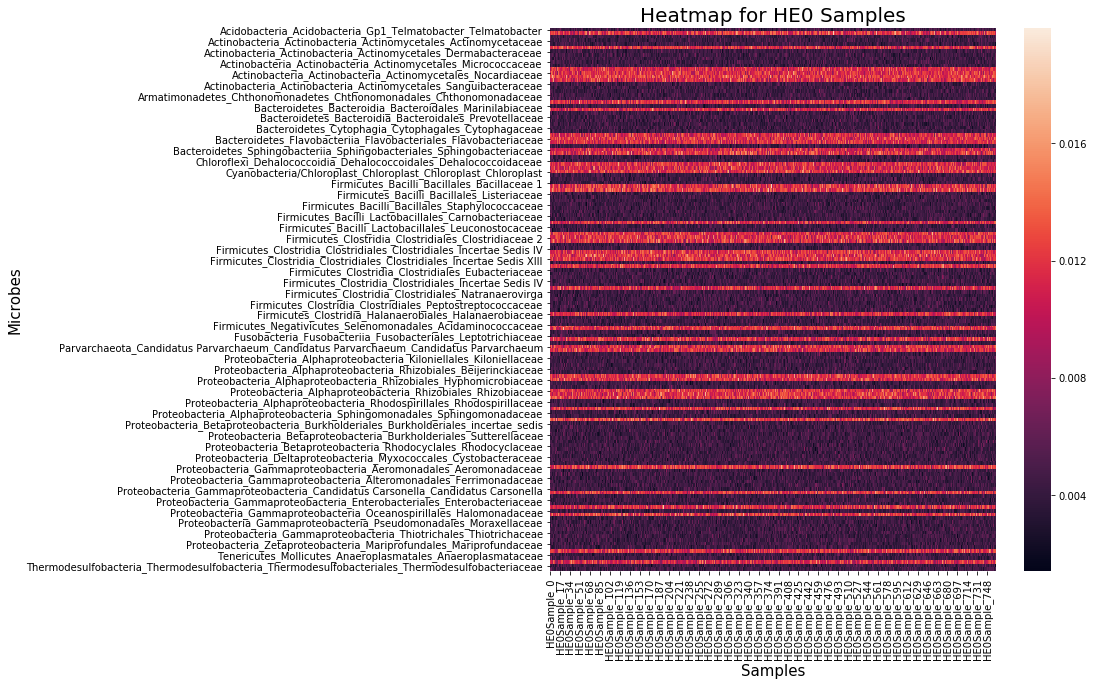

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(HE0_df)
plt.title('Heatmap for HE0 Samples', fontsize = 20) 
plt.xlabel('Samples', fontsize = 15)
plt.ylabel('Microbes', fontsize = 15)

Text(68.09374999999997, 0.5, 'Microbes')

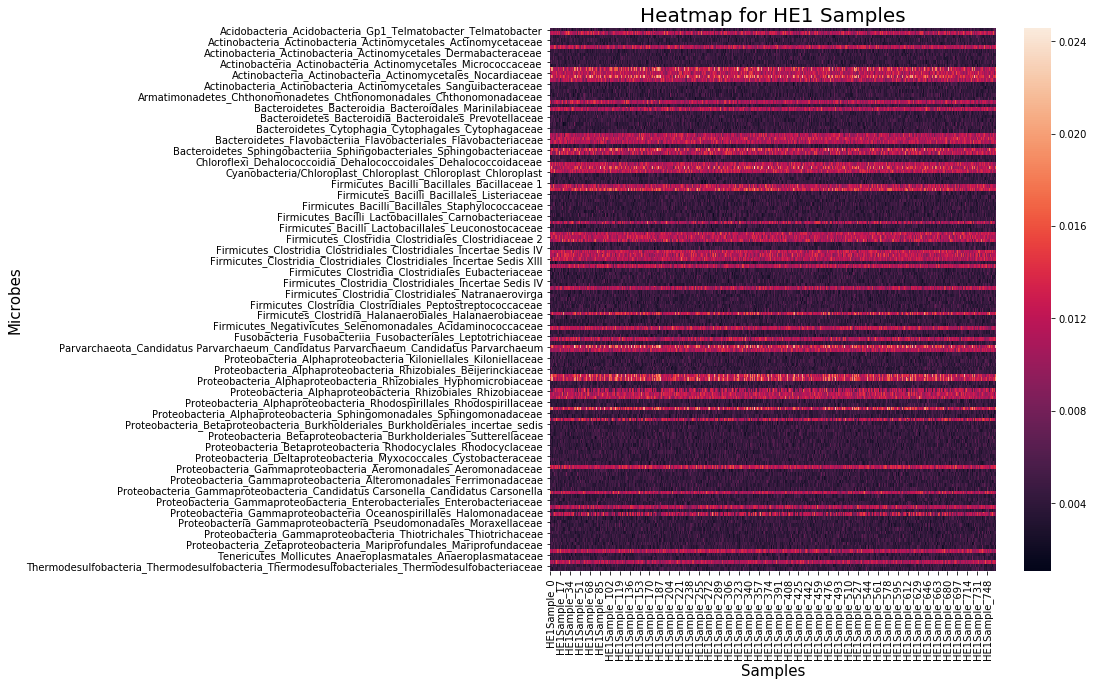

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(HE1_df)
plt.title('Heatmap for HE1 Samples', fontsize = 20) 
plt.xlabel('Samples', fontsize = 15)
plt.ylabel('Microbes', fontsize = 15)

**Interpretation:** The above heatmap shows the visual depiction of the relative abundance matrices. The color scale shows the variation in the values of relative abundance. The color scale showing the range of values of above 0.012 in HE0 shows higher relative abundance and the darker shades are the one with the lower ones. We can also see that for one microbe, there are color variations for relative abundance in the samples too. For HE0, there is lesser variation in the relative abundance in overall samples as compared to HE1. Also, there is wider variation in HE1 as the color scale depicts values from 0 to 0.024.

## Task 2: Statistical Analysis
- Recall that the biologists wish to identify microbes with significantly altered abundance level related to HE. A microbe’s abundance is declared altered if the difference observed in its abundance level between HE0 samples and HE1 samples is statistically significant.
### 1. Kolmogorov–Smirnov (KS) Test
#### a. For each microbe, find the p-value of a two-sample KS test on its expression across HE0 samples vs. HE1 samples.

In [28]:
HE0_df.head()

,HE0Sample_0,HE0Sample_1,HE0Sample_2,HE0Sample_3,HE0Sample_4,HE0Sample_5,HE0Sample_6,HE0Sample_7,HE0Sample_8,HE0Sample_9,...,HE0Sample_754,HE0Sample_755,HE0Sample_756,HE0Sample_757,HE0Sample_758,HE0Sample_759,HE0Sample_760,HE0Sample_761,HE0Sample_762,HE0Sample_763
Microbe Name,,,,,,,,,,,,,,,,,,,,,
Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,0.004239,0.004345,0.004423,0.004463,0.005372,0.004136,0.004457,0.004049,0.004638,0.004429,...,0.004464,0.004636,0.004046,0.005518,0.005073,0.003527,0.005413,0.003140,0.002998,0.004829
Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,0.013269,0.012312,0.011611,0.013033,0.013689,0.012752,0.009772,0.012148,0.013743,0.011160,...,0.010603,0.013565,0.012139,0.012875,0.013294,0.014107,0.012694,0.013082,0.008244,0.010401
Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,0.003502,0.005251,0.006082,0.003749,0.004332,0.004136,0.004972,0.004930,0.004638,0.003366,...,0.003906,0.002919,0.004782,0.006070,0.003498,0.004408,0.004853,0.004012,0.004310,0.005758
Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,0.003870,0.005794,0.005345,0.004106,0.002946,0.003963,0.005315,0.003697,0.005326,0.004429,...,0.005394,0.004979,0.004598,0.005518,0.005597,0.004761,0.004293,0.005233,0.004497,0.005386
Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,0.004976,0.003802,0.004239,0.004285,0.005198,0.004136,0.003257,0.002993,0.003264,0.004252,...,0.004092,0.003777,0.004782,0.004598,0.003848,0.004585,0.003360,0.004186,0.004684,0.002043


In [29]:
HE1_df.head()

,HE1Sample_0,HE1Sample_1,HE1Sample_2,HE1Sample_3,HE1Sample_4,HE1Sample_5,HE1Sample_6,HE1Sample_7,HE1Sample_8,HE1Sample_9,...,HE1Sample_754,HE1Sample_755,HE1Sample_756,HE1Sample_757,HE1Sample_758,HE1Sample_759,HE1Sample_760,HE1Sample_761,HE1Sample_762,HE1Sample_763
Microbe Name,,,,,,,,,,,,,,,,,,,,,
Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,0.004864,0.004041,0.005630,0.005046,0.005041,0.005278,0.004005,0.003700,0.004295,0.004496,...,0.004154,0.004178,0.003416,0.004565,0.004000,0.004509,0.005419,0.007286,0.004056,0.005797
Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,0.011985,0.012124,0.010732,0.012074,0.009001,0.012559,0.013234,0.011284,0.011391,0.015105,...,0.012463,0.012709,0.011104,0.011414,0.011478,0.007935,0.015906,0.009341,0.009956,0.007202
Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,0.005211,0.003866,0.004926,0.004505,0.005401,0.005461,0.005050,0.003330,0.003922,0.003776,...,0.003808,0.005571,0.004100,0.004390,0.005217,0.003968,0.003146,0.004110,0.004240,0.004391
Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,0.003995,0.003866,0.004046,0.005406,0.003600,0.006189,0.003308,0.004255,0.004482,0.004855,...,0.003981,0.003830,0.004783,0.004214,0.005565,0.003968,0.004195,0.005044,0.004609,0.004567
Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,0.002953,0.003514,0.004574,0.005046,0.003420,0.004186,0.004701,0.004624,0.003361,0.004496,...,0.003116,0.003656,0.003758,0.004917,0.005043,0.003787,0.004020,0.003363,0.005531,0.006499


In [30]:
from scipy import stats

test_statistic = []
p_values = []

for i in range(len(HE0_df)):
    data1 = HE0_df.iloc[i,:].values
    data2 = HE1_df.iloc[i,:].values
    ks_results = stats.ks_2samp(data1, data2)
    test_statistic.append(ks_results[0])
    p_values.append(ks_results[1])
    
KS_Test_Results = pd.DataFrame()
KS_Test_Results['test_statistic'] = test_statistic
KS_Test_Results['p_values'] = p_values

In [31]:
KS_Test_Results

,test_statistic,p_values
0,0.056283,0.177747
1,0.094241,0.002248
2,0.064136,0.086320
3,0.028796,0.909664
4,0.035340,0.726977
...,...,...
144,0.045812,0.399356
145,0.053665,0.221336
146,0.081152,0.013030
147,0.036649,0.684300


###### b. What is the null hypothesis of the KS test in our context? Use one microbe as an example to explain your answer.

Null Hypothesis: (for example - Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3)
The distribution of the relative abundance data for microbe "Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3" is same for both the samples (HE0 and HE1)


###### c. Count the number of microbes with significantly altered expression at alpha=0.1, 0.05, 0.01, 0.005 and 0.001 level? Summarize your answers in a table.

In [32]:
alpha = [0.1, 0.05, 0.01, 0.005, 0.001]
count_altered_expressions = []

for alpha_value in alpha:
    count_altered_expressions.append(sum(KS_Test_Results['p_values'] <= alpha_value))
    
significant_altered_expression = pd.DataFrame()
significant_altered_expression['Alpha_Value'] = alpha
significant_altered_expression['Total_altered_expressions'] = count_altered_expressions

significant_altered_expression

,Alpha_Value,Total_altered_expressions
0,0.100,48
1,0.050,36
2,0.010,27
3,0.005,24
4,0.001,20


### 2. Multiple Testing

#### (a) P-value of 0.05 is generally considered a good threshold for significant discovery. What does a p-value of 0.05 represent in our context?

p-value of 0.05 signifies that there is 5% probability that the new independent sample will follow what the null distribution concludes.
In our context, p-value of 0.05 for a particular microbe (let's say - Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3) means that for two any random independent samples collected from HE0 and HE1, there is 5% probability that there is no significant difference between the relative abundance of Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3 in both the samples.

#### (b) Based on the definition of p-value, if the null hypothesis is true, what distribution will the p-values follow? (Hint: Google the definition of p-value) 

Given the null hypothesis is true, the distribution that the p-values follow will be Uniform. It is because all the p-values values are likely within the range. 

#### (c) If no microbe’s abundance was altered, how many significant p-values does one expect to see at alpha=0.1, 0.05, 0.01, 0.005 and 0.001 level? Compare your answers with your results in Task 2.1.c. Show the comparison in a table.

In [33]:
alpha = [0.1, 0.05, 0.01, 0.005, 0.001]
significant_p_values_count = []

for alpha_value in alpha:
    significant_p_values_count.append(sum(KS_Test_Results['p_values'] > alpha_value))
    
significant_altered_expression['significant_p_values_count'] = significant_p_values_count

significant_altered_expression

,Alpha_Value,Total_altered_expressions,significant_p_values_count
0,0.100,48,101
1,0.050,36,113
2,0.010,27,122
3,0.005,24,125
4,0.001,20,129


#### (d) A Q-Q (quantile-quantile) plot is used to compare two probability distributions by plotting their quantiles against each other. Say you’ve performed N KS tests in Task 2.1.a. Following the procedure below, plot a Q-Q plot to compare the distribution of p-values of your statistical tests (Task 2.1.a., referred to as observed p-values) with the distribution of p-values when the null hypothesis is true (Task 2.2.b.):

In [34]:
import math

n = 100

#Sampling n observed p-values
observed_p_values = np.random.choice(a=KS_Test_Results['p_values'].values, size = n, replace=False)

#Sampling n expected p-values
expected_p_values = np.random.uniform(0,1,size=n)

observed_p_values_log = []
expected_p_values_log = []

#taking -log10 of the p-values
for i in range(n):
    observed_p_values_log.append(-math.log10(observed_p_values[i]))
    expected_p_values_log.append(-math.log10(expected_p_values[i]))
    
#Sorting in ascending
observed_p_values_log = np.sort(observed_p_values_log)
expected_p_values_log = np.sort(expected_p_values_log)

Text(0, 0.5, 'Observed')

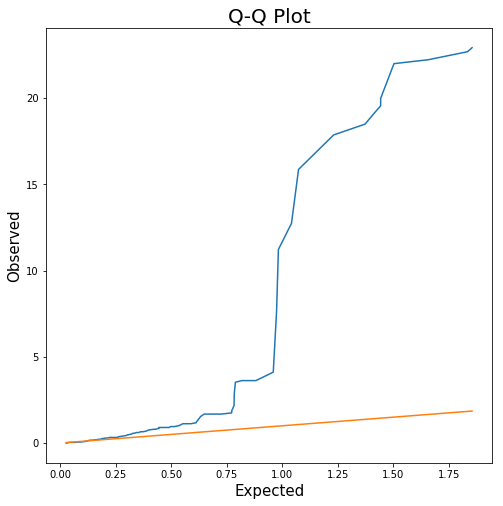

In [35]:
plt.figure(figsize=(8,8))
plt.plot(expected_p_values_log, observed_p_values_log)
#plt.plot(observed_p_values_log, expected_p_values_log)
plt.plot(expected_p_values_log, expected_p_values_log)
plt.title('Q-Q Plot', fontsize = 20) 
plt.xlabel('Expected', fontsize = 15)
plt.ylabel('Observed', fontsize = 15)

#### e. Answer the following questions:
#### i) How does taking the -log10() of the p-values help you visualize the p-value distribution?
Most of the observed p-values are very small (skewed towards 0) whereas, the expected p-values are uniformly distributed between 0 and 1. Using a negative logarithmic scale of base 10 on the p-values bring them all in a similar scale. This makes it possible (and more logical) to use the p-values for a qq-plot.

#### ii. What can you conclude from the Q-Q plot? (Hint: Think about what it means if the Q-Q plot approximately aligns or doesn’t align with the x=y line and what it implies about the null hypothesis.)
As the q-q plot doesn't align well with the x-y line, it can be concluded that the observed p-values don't follow the same distribution as the expected p-values. That means, the observed p-values don't seem to have come from a uniform distribution. Hence, it implies that many moderately significant p-values are more significant than expected under the null hypothesis.

# Task 3: Dimensionality Reduction and Clustering
## PCA
### a. Treating microbes as features (dimensions), perform PCA on the relative abundance data. (Hint: make use of the decomposition.PCA API in the sklearn package. Select “full” for svd_solver.)

In [36]:
HE0_orig = RelativeAbundance_HE0.iloc[:,1:].values.T
HE1_orig  = RelativeAbundance_HE1.iloc[:,1:].values.T

In [37]:
from sklearn.decomposition import PCA
pca_HE0 = PCA(svd_solver='full')
HE0_mod = pca_HE0.fit_transform(HE0_orig)
pca_HE1 = PCA(svd_solver='full')
HE1_mod = pca_HE1.fit_transform(HE1_orig)

### b. Order the principal components by decreasing contribution to total variance. Plot a scree plot to show the fraction of total variance in the data as explained by each principal component. How many principal components are needed in order to explain 30% of the total variance?


Text(0, 0.5, 'Fraction of Total Variance')

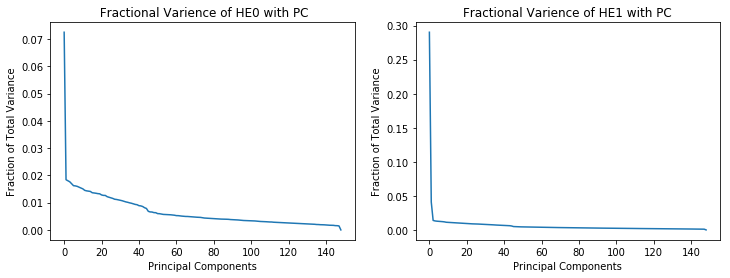

In [38]:
var_HE0 = pca_HE0.explained_variance_ratio_
cumsumvar_HE0 = np.cumsum(var_HE0)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(var_HE0)
plt.title(' Fractional Varience of HE0 with PC')
plt.xlabel('Principal Components')
plt.ylabel('Fraction of Total Variance')
plt.subplot(1,2,2)
var_HE1  = pca_HE1.explained_variance_ratio_
cumsumvar_HE1  = np.cumsum(var_HE1)
plt.plot(var_HE1)
plt.title('Fractional Varience of HE1 with PC')
plt.xlabel('Principal Components')
plt.ylabel('Fraction of Total Variance')

No of Principal Components needed to explain 30% of total variance for he0s: 15
No of Principal Components needed to explain 30% of total variance for he1:  2


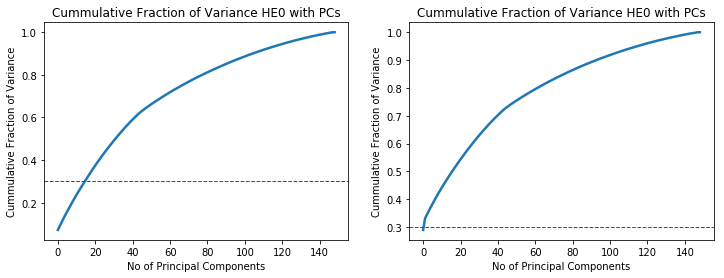

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(cumsumvar_HE0,linewidth=2.5)
plt.axhline(y=0.3,color='r',linewidth=1,linestyle='--')
plt.title('Cummulative Fraction of Variance HE0 with PCs')
plt.xlabel('No of Principal Components')
plt.ylabel('Cummulative Fraction of Variance')
plt.subplot(1,2,2)
plt.plot(cumsumvar_HE1,linewidth=2.5)
plt.axhline(y=0.3,color='r',linewidth=1,linestyle='--')
plt.title('Cummulative Fraction of Variance HE0 with PCs')
plt.xlabel('No of Principal Components')
plt.ylabel('Cummulative Fraction of Variance')
No_PC_HE0 = sum(cumsumvar_HE0 <= 0.3)
No_PC_HE1  = sum(cumsumvar_HE1 <= 0.3)
No_PC_HE1+=1
print('No of Principal Components needed to explain 30% of total variance for he0s:',No_PC_HE0)
print('No of Principal Components needed to explain 30% of total variance for he1: ',No_PC_HE1)

### c. Plot a scatter plot of the relative abundance with only the first two components. Briefly summarize your observations.

In the plot we can see that clustering is happeing  HE0 data has 2 clusters whereas there are 3 Clusters for the HE1 data. But, these points don't explain the whole dataset.


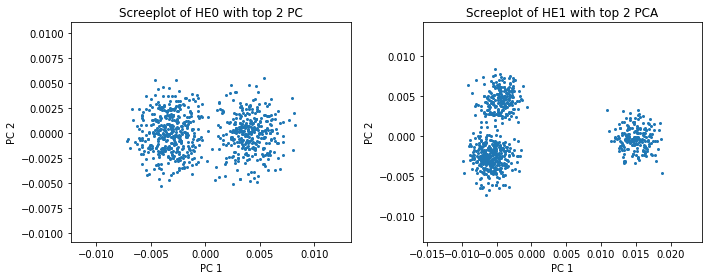

In [40]:
pca_HE0 = PCA(svd_solver='full',n_components=2)
HE0_mod = pca_HE0.fit_transform(HE0_orig)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(HE0_mod[:, 0], HE0_mod[:, 1],s=4)
plt.title('Screeplot of HE0 with top 2 PC')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.subplot(1,2,2)
pca_HE1 = PCA(svd_solver='full',n_components=2)
HE1_mod = pca_HE1.fit_transform(HE1_orig)
plt.scatter(HE1_mod[:, 0], HE1_mod[:, 1],s=4)
plt.title('Screeplot of HE1 with top 2 PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
print("In the plot we can see that clustering is happeing  HE0 data has 2 clusters whereas there are 3 Clusters for the HE1 data. But, these points don't explain the whole dataset.")



# t-SNE

### (a) Using the given samples and treating microbe abundances as features (dimensions), perform t-SNE to visualize the data in 2D. (Hint: make use of the manifold.TSNE API in the scikit-learn package with parameter random_state=42) t-SNE and plotting should be done for HE0 samples and HE1 samples separately. Repeat the same t-SNE and plotting using the values 62 and 82 for random_state. Briefly summarize your observations.


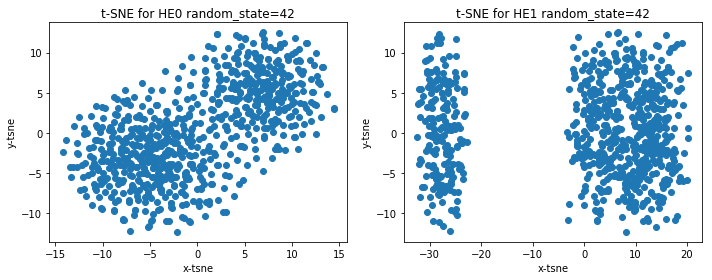

In [41]:
from sklearn.manifold import TSNE

tsne_HE0 = TSNE(n_components=2,random_state=42)
tsne_HE0_mod = tsne_HE0.fit_transform(HE0_orig)

plt.figure(figsize=(10,4))
# HE0 plot
plt.subplot(1,2,1)
plt.scatter(tsne_HE0_mod[:, 0], tsne_HE0_mod[:, 1],cmap = 'plasma')
plt.title('t-SNE for HE0 random_state=42')
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
# HE1 plot
tsne_HE1 = TSNE(n_components=2,random_state=42)
cells_tsne_HE1 = tsne_HE1.fit_transform(HE1_orig)
plt.subplot(1,2,2)
plt.scatter(cells_tsne_HE1[:, 0], tsne_HE0_mod[:, 1],cmap = 'plasma')
plt.title('t-SNE for HE1 random_state=42')
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.tight_layout()

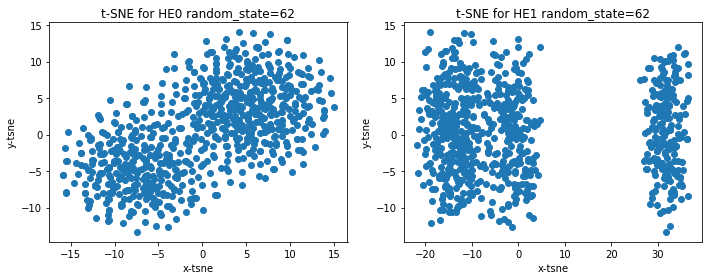

In [42]:
from sklearn.manifold import TSNE

tsne_HE0 = TSNE(n_components=2,random_state=62)
tsne_HE0_mod = tsne_HE0.fit_transform(HE0_orig)

plt.figure(figsize=(10,4))
# HE0 plot
plt.subplot(1,2,1)
plt.scatter(tsne_HE0_mod[:, 0], tsne_HE0_mod[:, 1],cmap = 'plasma')
plt.title('t-SNE for HE0 random_state=62')
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
# HE1 plot
tsne_HE1 = TSNE(n_components=2,random_state=62)
cells_tsne_HE1 = tsne_HE1.fit_transform(HE1_orig)
plt.subplot(1,2,2)
plt.scatter(cells_tsne_HE1[:, 0], tsne_HE0_mod[:, 1],cmap = 'plasma')
plt.title('t-SNE for HE1 random_state=62')
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.tight_layout()

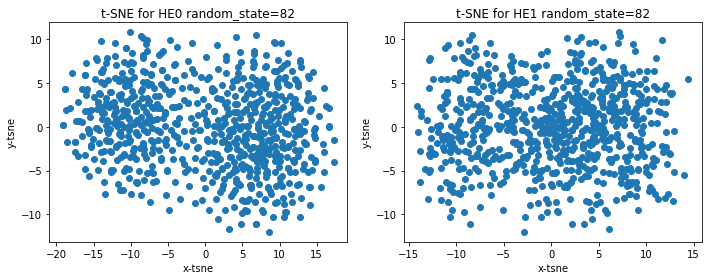

In [43]:
from sklearn.manifold import TSNE

tsne_HE0 = TSNE(n_components=2,random_state=82)
tsne_HE0_mod = tsne_HE0.fit_transform(HE0_orig)

plt.figure(figsize=(10,4))
# HE0 plot
plt.subplot(1,2,1)
plt.scatter(tsne_HE0_mod[:, 0], tsne_HE0_mod[:, 1],cmap = 'plasma')
plt.title('t-SNE for HE0 random_state=82')
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
# HE1 plot
tsne_HE1 = TSNE(n_components=2,random_state=82)
cells_tsne_HE1 = tsne_HE1.fit_transform(HE1_orig)
plt.subplot(1,2,2)
plt.scatter(cells_tsne_HE1[:, 0], tsne_HE0_mod[:, 1],cmap = 'plasma')
plt.title('t-SNE for HE1 random_state=82')
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.tight_layout()

Observation: The clusters for HE0 are not very clear but they are fairly clear in the case of HE1 for random states of 42 and 62. But in case of random state 82 the clusters for both HE0 and HE1 are not distinct.


### (b) Discuss the similarities and differences between results when clustering with PCA and tSNE.

Both PCA and t-SNE aim at dimentionality reduction and for our case they both have formed 2 clusters in the case of HE0 and 3 clusters in case of HE1 data.<br>
We get good clusters with both the methods. The plot formed by PCA have smaller scattering that the ones formed by T-SNE.<br>
PCA is a linear technique for dimentionalty reduction whereas t-SNE is non linear. Hence for data wwith large number of dimention such as ours it is recommended to use PCA since the computation time will be lower in the case of PCA when compared to t-SNE.<br>
Also, in the case of T-SNE the output is very different with each random_state.

# Clustering
### (a) Kmeans 

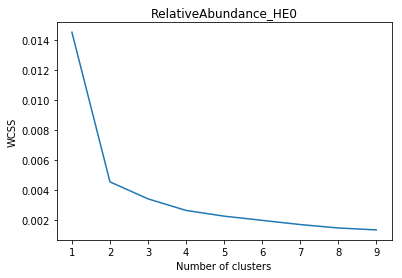

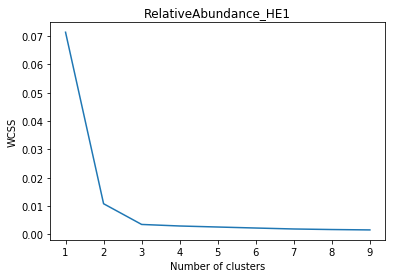

In [44]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(HE0_mod[:, 0:2])
    wcss.append(kmeans.inertia_)
plt.subplot(1,1,1)
plt.plot(range(1, 10), wcss)
plt.title('RelativeAbundance_HE0')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(HE1_mod[:, 0:2])
    wcss.append(kmeans.inertia_)
plt.subplot(1,1,1)
plt.plot(range(1, 10), wcss)
plt.title('RelativeAbundance_HE1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(HE1_mod[:, 0:2])
    wcss.append(kmeans.inertia_)


In [46]:
kmeans_HE0 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_HE0_labels = kmeans_HE0.fit_predict(HE0_mod[:, 0:2])
kmean_HE1 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmean_HE1_labels  = kmean_HE1.fit_predict(HE1_mod[:, 0:2])

 There are 2 clusters in HE0 and 3 clusters in HE1 data


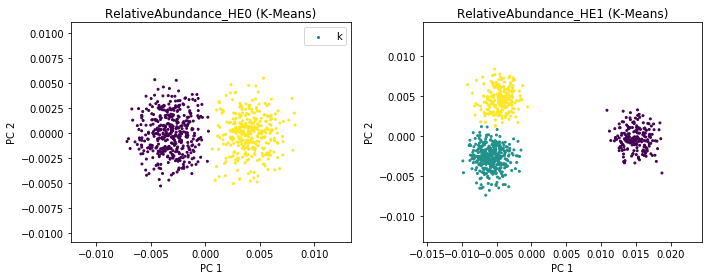

In [47]:
plt.figure(figsize=(10,4))
# HE0 plot
plt.subplot(1,2,1)
plt.scatter(HE0_mod[:, 0], HE0_mod[:, 1],s=4, c=kmeans_HE0_labels)
plt.title('RelativeAbundance_HE0 (K-Means)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend('kmeans')
# HE1 plot
plt.subplot(1,2,2)
plt.scatter(HE1_mod[:, 0], HE1_mod[:, 1],s=4, c=kmean_HE1_labels)

plt.title('RelativeAbundance_HE1 (K-Means)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
print(" There are 2 clusters in HE0 and 3 clusters in HE1 data")

In [48]:
print("The unique vaues of the cluster of HE0 are",np.unique(kmeans_HE0_labels), "So we can say that there are 2 clusters.")
print("The unique vaues of the cluster of HE0 are",np.unique(kmean_HE1_labels), "So we can say that there are 3 clusters.")


The unique vaues of the cluster of HE0 are [0 1] So we can say that there are 2 clusters.
The unique vaues of the cluster of HE0 are [0 1 2] So we can say that there are 3 clusters.


### (b) Gaussian Mixture Model Clustering 

In [49]:
from sklearn.mixture import GaussianMixture
gmm_HE0 = GaussianMixture(n_components=2)
gmm_HE0_labels = gmm_HE0.fit_predict(100*HE0_mod[:, 0:2])
gmm_HE1 = GaussianMixture(n_components=3)
gmm_HE1_labels = gmm_HE1.fit_predict(100*HE1_mod[:, 0:2])

 There are 2 clusters in HE0 and 3 clusters in HE1 data


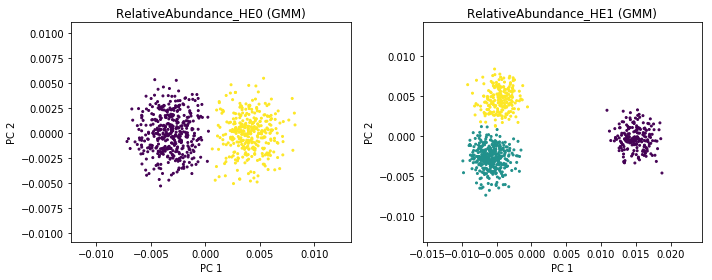

In [50]:
plt.figure(figsize=(10,4))
# HE0 plot
plt.subplot(1,2,1)
plt.scatter(HE0_mod[:, 0], HE0_mod[:, 1],s=4, c=gmm_HE0_labels)
plt.title('RelativeAbundance_HE0 (GMM)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# HE1 plot
plt.subplot(1,2,2)
plt.scatter(HE1_mod[:, 0], HE1_mod[:, 1],s=4, c=gmm_HE1_labels)

plt.title('RelativeAbundance_HE1 (GMM)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
print(" There are 2 clusters in HE0 and 3 clusters in HE1 data")

In [51]:
print("The unique vaues of the cluster of HE0 are",np.unique(gmm_HE0_labels), "So we can say that there are 2 clusters.")
print("The unique vaues of the cluster of HE0 are",np.unique(gmm_HE1_labels), "So we can say that there are 3 clusters.")


The unique vaues of the cluster of HE0 are [0 1] So we can say that there are 2 clusters.
The unique vaues of the cluster of HE0 are [0 1 2] So we can say that there are 3 clusters.


### (c) Single Linkage Hierarchical Clustering

In [52]:
from sklearn.cluster import AgglomerativeClustering
hierar_HE0 = AgglomerativeClustering( affinity = 'euclidean', linkage = 'single')
hierar_HE0_labels= hierar_HE0.fit_predict(HE0_mod[:, 0:1])
hierar_HE1 = AgglomerativeClustering(affinity = 'euclidean', linkage = 'single')
hierar_HE1_labels = hierar_HE1.fit_predict(HE1_mod[:, 0:1])

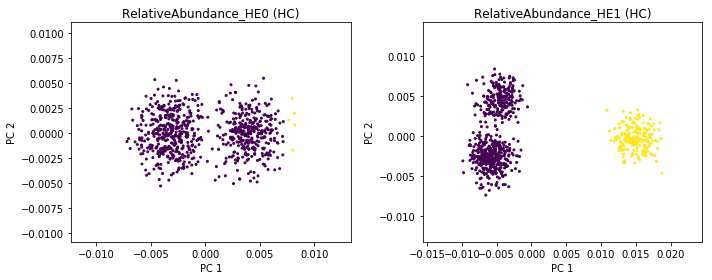

In [53]:
plt.figure(figsize=(10,4))
# HE0 plot
plt.subplot(1,2,1)
plt.scatter(HE0_mod[:, 0], HE0_mod[:, 1], s=4, c=hierar_HE0_labels)
plt.title('RelativeAbundance_HE0 (HC)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# HE1 plot
plt.subplot(1,2,2)
plt.scatter(HE1_mod[:, 0], HE1_mod[:, 1],s=4, c=hierar_HE1_labels)
plt.title('RelativeAbundance_HE1 (HC)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()

### (c) Complete Linkage Hierarchical Clustering

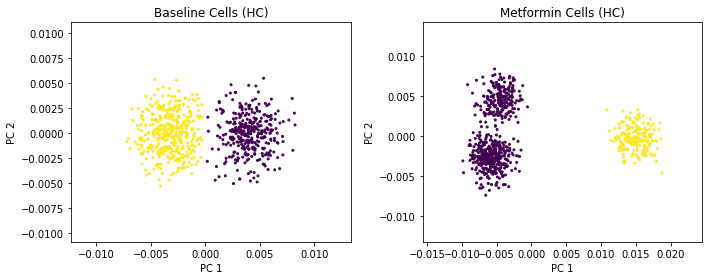

In [54]:
hierar_HE0 = AgglomerativeClustering(n_clusters=2,affinity = 'euclidean', linkage = 'complete')
hierar_HE0_labels= hierar_HE0.fit_predict(HE0_mod[:, 0:1])
hierar_HE1 = AgglomerativeClustering(n_clusters=2,affinity = 'euclidean', linkage = 'complete')
hierar_HE1_labels = hierar_HE1.fit_predict(HE1_mod[:, 0:1])
plt.figure(figsize=(10,4))
# HE0 plot
plt.subplot(1,2,1)
plt.scatter(HE0_mod[:, 0], HE0_mod[:, 1], s=4, c=hierar_HE0_labels)
plt.title('Baseline Cells (HC)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# HE1 plot
plt.subplot(1,2,2)
plt.scatter(HE1_mod[:, 0], HE1_mod[:, 1],s=4, c=hierar_HE1_labels)
plt.title('Metformin Cells (HC)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()

### (d) Discuss the differences between the single and complete linkage hierarchical clustering methods. Do you see any major differences in the generated clusters? Is there anything about our data which affects if we see a difference between the two linkage options?

The results for the Single and the Completele link Hierarchical clustering are very differenct from one another.<br><br>
Since the  the merge criterion of single link is Local where as it is non-Local for complete link<br>
The single link completely failed fo the HE0 data becuse it could cluste only a few points to the other cluster and not judge the whole cluster. This mistake was not done by Complete Link Clustering.<br><br>

The Results for the HE1 data were very similar for both the link methods.

### (e) Compare your results for different clustering methods and interpret them. Select the results from one of the clusters for the following analyses. Pay close attention to the generated clusters when choosing which results to use.

The result given by K-Means and GMM were really consistant with what we had expected after performing PCA and t-SNE to the data and these results were better that the results for Hierarchical clustering.<br><br>
If given a choice among all these methods we would recommend going for K-Means because the results were consistant with K-Means and it is easy to compute.

### (f) In context, what do the clusters you have found represent? What are some factors which could account for this type of clustering pattern?

Clustes we found represent the closeness of a relative abundunce to othes in the same cluster.
These clustes can be inferred as subpopulation of the respective HE dataset.

These clustering pattern can be a result of the number of PCA's that explain the variance of the dataset in the dimentions.

### (g) Based on your process for deciding the number of clusters to partition the data into, what situations or factors might result in your decision being inaccurate?

For the project we mainly considered PCA's which cover about 30% of the overall variance. This method of interpretation is okay for HE1, but is not very accurate for HE0. Hence we may see different clustering if the number of dimensions were increased.
Most of the interpretation that we did was based on our visual interpretation.

# Task 4: Interpreting Your Results
## 1. Identify microbes with altered abundance levels

### a. For each HE1 subpopulation, determine whether it has a significantly different microbiome than the HE0 samples. To get credit you must explain your method before performing the analysis. Show and explain your decision process in detail. Provide numbers, tables and/or graphs where necessary to justify your reasoning or results.


In [55]:
cluster_he0_centers = kmeans_HE0.cluster_centers_
cluster_he1_centers = kmean_HE1.cluster_centers_
print(cluster_he0_centers)
print(cluster_he1_centers)

[[-3.20174480e-03  1.68642427e-05]
 [ 4.07841302e-03 -2.14818330e-05]]
[[ 0.01494917 -0.00030315]
 [-0.00579771 -0.00268647]
 [-0.00450106  0.0046089 ]]


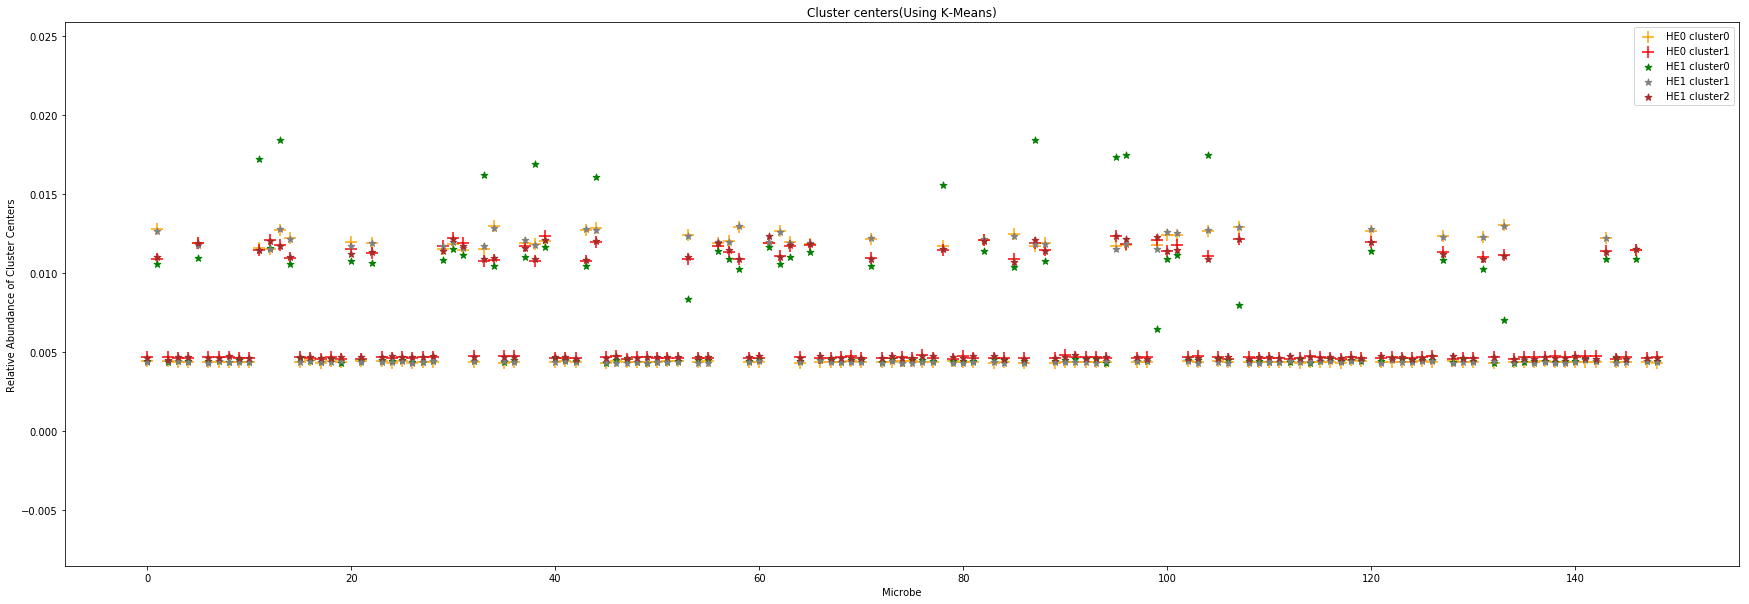

red ==> brown
orange ==> green
gray


In [56]:
center_HE0 = RelativeAbundance_HE0.iloc[:,1:].apply(np.mean,axis = 1)
center_HE1 = RelativeAbundance_HE1.iloc[:,1:].apply(np.mean,axis = 1)

#Create a list of colors to assign to the clusters formed 
def_colors0 = ['orange','red']
def_colors1 = ['green','gray','brown']
i=0

plt.figure(figsize = (30,10))

for cluster in cluster_he0_centers:
    new_dp_cluster0 = center_HE0 + cluster[0]*pca_HE0.components_[0] + cluster[1]*pca_HE0.components_[1]
    plt.scatter(range(149),new_dp_cluster0, color = def_colors0[i],marker = '+',s = 150,label = 'HE0 cluster' + str(i))
    i+=1

i=0
for cluster in cluster_he1_centers:
    new_dp_cluster1= center_HE1 + cluster[0]*pca_HE1.components_[0] + cluster[1]*pca_HE1.components_[1]
    plt.scatter(range(149),new_dp_cluster1, color = def_colors1[i],marker = '*', s= 50,label = 'HE1 cluster' + str(i))
    i+=1

#Plotting Results
plt.xlabel('Microbe')
plt.ylabel('Relative Abundance of Cluster Centers')
plt.title('Cluster centers(Using K-Means)')
plt.legend()
plt.show()

print('red ==> brown')
print('orange ==> green')
print('gray')


Procedure: 
We already have the PCA's obtained in the earlier tasks. For the K-means, we are first going to calculate the clusters centers using 'kmeans_HE0.cluster_centers_' and 'kmean_HE1.cluster_centers_'. Now for comparing the difference between two subpopulations, we have to perform comparison on the same co-ordinate plane (149* 1). This can be achieved using adding the 'mean' obtained using original data. The results obtained using the scatter plot can be compared and analysed for determining the relations.

### b. For each HE1 subpopulation with a significantly different microbiome, identify the HE0 subpopulation that is most similar to. Show and explain your decision process in detail. Provide numbers, tables and/or graphs where necessary. When performing this step keep in mind that 5-20 microbes should have a significantly altered abundance. 

Calculating the ED (Euclidean Distance) between different clusters obtained in part a) to get the results.

In [57]:
#Calculate Euclidean Distance 
print(' Calculate Euclidean Distance between HE1 cluster centers and HE0 clusters \n')
for i in range(3):
    print('Cluster number HE1', i)
    print('HE1 cluster center ==> \n', new_dp_cluster1[i])
    print('\n')
    
    for i,HE0_ in enumerate(new_dp_cluster0):
        Euclidean_dist = np.linalg.norm(new_dp_cluster1[i]-HE0_)
        print('Distance using HE0 cluster center '+str(i),'==>', Euclidean_dist)
        print('\n')

 Calculate Euclidean Distance between HE1 cluster centers and HE0 clusters 

Cluster number HE1 0
HE1 cluster center ==> 
 0.004634101815423499


Distance using HE0 cluster center 0 ==> 3.449500554619962e-05


Distance using HE0 cluster center 1 ==> 8.032217614484076e-05


Distance using HE0 cluster center 2 ==> 0.00014719269823985654


Distance using HE0 cluster center 3 ==> 5.0769286065741395e-05


Distance using HE0 cluster center 4 ==> 7.370174774925554e-05


Distance using HE0 cluster center 5 ==> 4.5779199705400786e-05


Distance using HE0 cluster center 6 ==> 4.0862118137603015e-05


Distance using HE0 cluster center 7 ==> 4.043147743258441e-05


Distance using HE0 cluster center 8 ==> 7.341658886056337e-05


Distance using HE0 cluster center 9 ==> 3.707472469317158e-05


Distance using HE0 cluster center 10 ==> 3.0404119362823813e-05


Distance using HE0 cluster center 11 ==> 3.691714432562006e-05


Distance using HE0 cluster center 12 ==> 8.567904039599727e-05


Distance using

Distance using HE0 cluster center 71 ==> 7.044214017078512e-05


Distance using HE0 cluster center 72 ==> 4.111304835408003e-06


Distance using HE0 cluster center 73 ==> 0.00010944610650227577


Distance using HE0 cluster center 74 ==> 3.433136436560135e-05


Distance using HE0 cluster center 75 ==> 5.28647107771044e-05


Distance using HE0 cluster center 76 ==> 0.0001129120553074606


Distance using HE0 cluster center 77 ==> 0.0001225437745501455


Distance using HE0 cluster center 78 ==> 9.455676553042983e-05


Distance using HE0 cluster center 79 ==> 0.00010101270015196086


Distance using HE0 cluster center 80 ==> 0.00011308167857900907


Distance using HE0 cluster center 81 ==> 0.0001130212642142768


Distance using HE0 cluster center 82 ==> 0.00010201708843119925


Distance using HE0 cluster center 83 ==> 9.843262862459928e-05


Distance using HE0 cluster center 84 ==> 6.0567563246368035e-05


Distance using HE0 cluster center 85 ==> 0.00019255813451552958


Distance using HE0 c

Results: 1) Red --> Brown  - overlapping so kind of close in terms of relation. 2)orange -> green  - overlapping so kind of close in terms of relation
3)gray - Significantly different  

### c. Identify microbes with significantly altered abundance by comparing each altered HE1 subpopulation with its corresponding HE0 subpopulation. Use KS test with alpha level=0.0000025. This alpha level was chosen to account for multiple testing caveats implied in Task 2.


In [58]:
Found_Microbes = []
Microbes_count = []
from scipy.stats import ks_2samp as ks_test

HE0_task4 = RelativeAbundance_HE0
he0c2 = HE0_task4.iloc[:,1:].T.reset_index().iloc[:,1:][pd.Series(kmeans_HE0_labels) ==1]

HE0_new = RelativeAbundance_HE0.iloc[:,1:].apply(np.mean,axis = 1)
HE1_new = RelativeAbundance_HE1.iloc[:,1:].apply(np.mean,axis = 1)

HE1_task4 = RelativeAbundance_HE1

he1c1 = HE1_task4.iloc[:,1:].T.reset_index().iloc[:,1:][pd.Series(kmean_HE1_labels) ==1]


for i in range(len(HE0_task4)):
    _, p = ks_test(he0c2[i], he1c1[i])
    alpha_level = 0.0000025
    if p < alpha_level:
        Found_Microbes.append(HE0_task4.iloc[i,0])
        Microbes_count.append(i)
print('The following Found_Microbes have significantly altered abundance ({0} Found_Microbes)'.format(len(Found_Microbes)))
Found_Microbes

The following Found_Microbes have significantly altered abundance (36 Found_Microbes)


['Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3',
 'Actinobacteria_Actinobacteria_Actinomycetales_Dermabacteraceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Microbacteriaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Propionibacteriaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Pseudonocardiaceae',
 'Bacteroidetes_Bacteroidia_Bacteroidales_Marinilabiliaceae',
 'Bacteroidetes_Sphingobacteriia_Sphingobacteriales_Sphingobacteriaceae',
 'Candidatus Saccharibacteria_Saccharibacteria_genera_incertae_sedis_Saccharibacteria_genera_incertae_sedis_Saccharibacteria_genera_incertae_sedis',
 'Chloroflexi_Anaerolineae_Anaerolineales_Anaerolineaceae',
 'Chrysiogenetes_Chrysiogenetes_Chrysiogenales_Chrysiogenaceae',
 'Firmicutes_Bacilli_Bacillales_Bacillaceae 2',
 'Firmicutes_Bacilli_Bacillales_Bacillales_Incertae Sedis XI',
 'Firmicutes_Bacilli_Bacillales_Paenibacillaceae 1',
 'Firmicutes_Bacilli_Bacillales_Thermoactinomycetaceae 1',
 'Firmicutes_Bacilli_Lactobacillales_Lactobacill

## 2. Identifying how abundance changes for each microbe in our data

### a. Which of the microbes that you identified show an increase of relative abundance in the HE1 sample? Do any show a decrease? 

In [59]:
print('Mean Microbe Abundances for alpha(for difference) as 0.0005:')
alpha=0.0005
for i in range(len(HE0_new)) :
    a = HE0_new[i]
    b = HE1_new[i]
    if b - a > alpha:
        print('Microbe {0}: {1}'.format(i,RelativeAbundance_HE0.iloc[i,0]),' has  higher microbe concentration')
    if a - b >= alpha:
        print('Microbe {0}: {1}'.format(i,RelativeAbundance_HE0.iloc[i,0]),' has  lower microbe concentration')

Mean Microbe Abundances for alpha(for difference) as 0.0005:
Microbe 11: Actinobacteria_Actinobacteria_Actinomycetales_Nakamurellaceae  has  higher microbe concentration
Microbe 13: Actinobacteria_Actinobacteria_Actinomycetales_Propionibacteriaceae  has  higher microbe concentration
Microbe 33: Bacteroidetes_Sphingobacteriia_Sphingobacteriales_Sphingobacteriaceae  has  higher microbe concentration
Microbe 38: Chrysiogenetes_Chrysiogenetes_Chrysiogenales_Chrysiogenaceae  has  higher microbe concentration
Microbe 44: Firmicutes_Bacilli_Bacillales_Bacillales_Incertae Sedis XI  has  higher microbe concentration
Microbe 53: Firmicutes_Bacilli_Lactobacillales_Lactobacillaceae  has  lower microbe concentration
Microbe 78: Firmicutes_Clostridia_Halanaerobiales_Halanaerobiaceae  has  higher microbe concentration
Microbe 87: Parvarchaeota_Candidatus Parvarchaeum_Candidatus Parvarchaeum_Candidatus Parvarchaeum  has  higher microbe concentration
Microbe 95: Proteobacteria_Alphaproteobacteria_Rhizo

### b. Are there any taxonomical relationships between the microbes with altered abundance? If so, identify these groupings. 

Yes, there is taxonomy in the name of the microbes.<br>
The starting part of the name reprents the family of the microbe where as the latter part of the name reprents the actual name of the microbe.
This can be clearly seen from the list of names of the microbes as printed below-

In [60]:
RelativeAbundance_HE0['Microbe Name'].tolist()

['Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter',
 'Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3',
 'Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Corynebacteriaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Dermabacteraceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Geodermatophilaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Microbacteriaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Micrococcaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Micromonosporaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Nakamurellaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Nocardiaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Propionibacteriaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Pseudonocardiaceae',
 'Actinobac